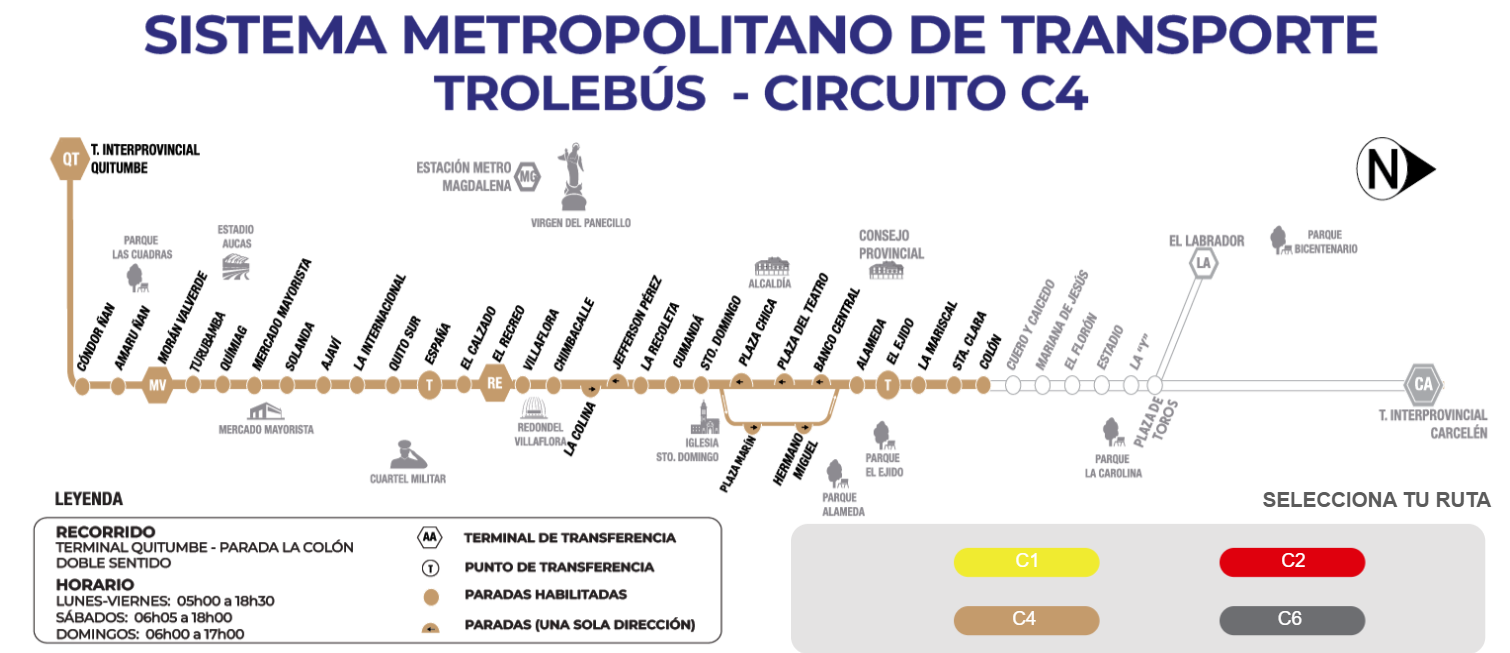

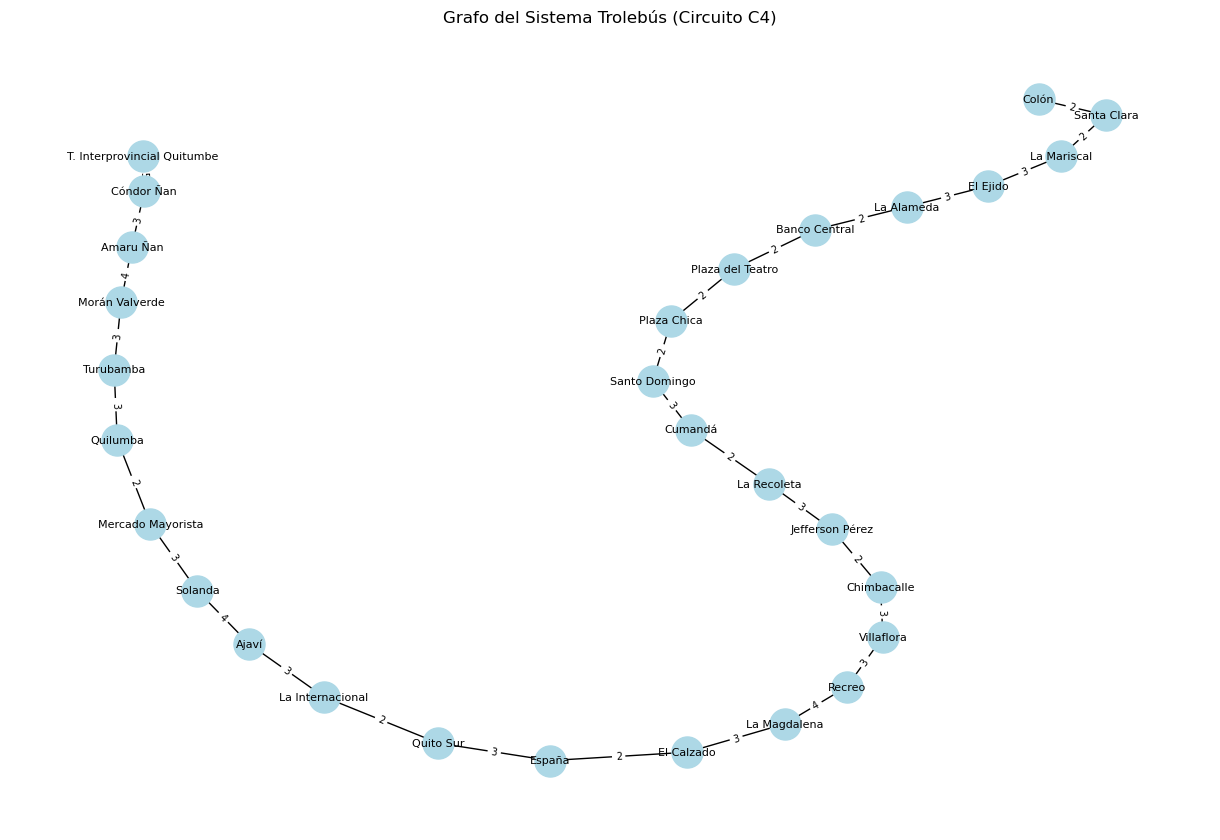

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd

# Lista de paradas (nodos) en orden según el mapa
trolebus_stations = [
    "T. Interprovincial Quitumbe", "Cóndor Ñan", "Amaru Ñan", "Morán Valverde",
    "Turubamba", "Quilumba", "Mercado Mayorista", "Solanda", "Ajaví",
    "La Internacional", "Quito Sur", "España", "El Calzado", "La Magdalena",
    "Recreo", "Villaflora", "Chimbacalle", "Jefferson Pérez", "La Recoleta",
    "Cumandá", "Santo Domingo", "Plaza Chica", "Plaza del Teatro", "Banco Central",
    "La Alameda", "El Ejido", "La Mariscal", "Santa Clara", "Colón"
]

# Representación del grafo como un diccionario de listas de adyacencia
graph = {
    "T. Interprovincial Quitumbe": [("Cóndor Ñan", 5)],
    "Cóndor Ñan": [("T. Interprovincial Quitumbe", 5), ("Amaru Ñan", 3)],
    "Amaru Ñan": [("Cóndor Ñan", 3), ("Morán Valverde", 4)],
    "Morán Valverde": [("Amaru Ñan", 4), ("Turubamba", 3)],
    "Turubamba": [("Morán Valverde", 3), ("Quilumba", 3)],
    "Quilumba": [("Turubamba", 3), ("Mercado Mayorista", 2)],
    "Mercado Mayorista": [("Quilumba", 2), ("Solanda", 3)],
    "Solanda": [("Mercado Mayorista", 3), ("Ajaví", 4)],
    "Ajaví": [("Solanda", 4), ("La Internacional", 3)],
    "La Internacional": [("Ajaví", 3), ("Quito Sur", 2)],
    "Quito Sur": [("La Internacional", 2), ("España", 3)],
    "España": [("Quito Sur", 3), ("El Calzado", 2)],
    "El Calzado": [("España", 2), ("La Magdalena", 3)],
    "La Magdalena": [("El Calzado", 3), ("Recreo", 4)],
    "Recreo": [("La Magdalena", 4), ("Villaflora", 3)],
    "Villaflora": [("Recreo", 3), ("Chimbacalle", 3)],
    "Chimbacalle": [("Villaflora", 3), ("Jefferson Pérez", 2)],
    "Jefferson Pérez": [("Chimbacalle", 2), ("La Recoleta", 3)],
    "La Recoleta": [("Jefferson Pérez", 3), ("Cumandá", 2)],
    "Cumandá": [("La Recoleta", 2), ("Santo Domingo", 3)],
    "Santo Domingo": [("Cumandá", 3), ("Plaza Chica", 2)],
    "Plaza Chica": [("Santo Domingo", 2), ("Plaza del Teatro", 2)],
    "Plaza del Teatro": [("Plaza Chica", 2), ("Banco Central", 2)],
    "Banco Central": [("Plaza del Teatro", 2), ("La Alameda", 2)],
    "La Alameda": [("Banco Central", 2), ("El Ejido", 3)],
    "El Ejido": [("La Alameda", 3), ("La Mariscal", 3)],
    "La Mariscal": [("El Ejido", 3), ("Santa Clara", 2)],
    "Santa Clara": [("La Mariscal", 2), ("Colón", 2)],
    "Colón": [("Santa Clara", 2)]
}

# Crear un grafo con NetworkX
G = nx.Graph()
for node, edges in graph.items():
    for edge, weight in edges:
        G.add_edge(node, edge, weight=weight)

# Visualización del grafo con Matplotlib
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=8)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_size=7
)
plt.title("Grafo del Sistema Trolebús (Circuito C4)")
plt.show()

# Visualización interactiva con Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=list(G.nodes()),
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        color='lightblue',
        size=10,
        line=dict(width=2)
    )
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="<br>Grafo Interactivo del Sistema Trolebús (Circuito C4)",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)))
fig.show()
